# Predicting telecom churn

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
pd.crosstab(df['churn'], df['international plan'], margins=True)

international plan,no,yes,All
churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


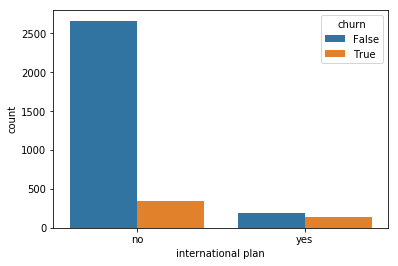

In [9]:
sns.countplot(x='international plan', hue='churn', data=df)

In [10]:
pd.crosstab(df['churn'], df['customer service calls'], margins=True)

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


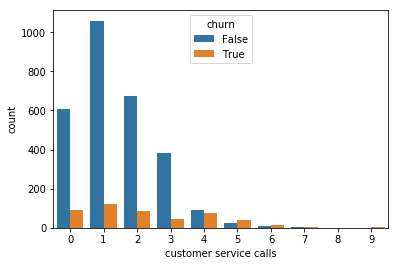

In [11]:
sns.countplot(x='customer service calls', hue='churn', data=df)

In [14]:
df['many_service_calls'] = (df['customer service calls'] > 3).astype('int')

pd.crosstab(df['many_service_calls'], df['churn'], margins=True)

churn,False,True,All
many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


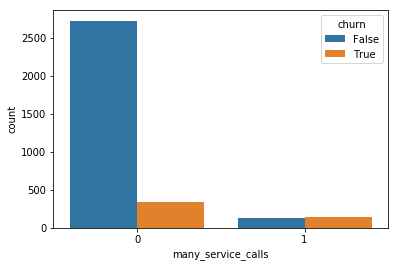

In [16]:
sns.countplot(x='many_service_calls', hue='churn', data=df)

In [20]:
pd.crosstab(df['many_service_calls'] & df['international plan'], df['churn'], margins=True)

churn,False,True,All
row_0,,,
False,2721,345,3066
True,129,138,267
All,2850,483,3333
